### Initialization

In [3]:
# import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [4]:
# constants
c = 3 * 10 **8
e = 1.6 * 10 **-19
ϵ0 = 8.854 * 10 **-12
me = 0.511 / c**2
mp = 938 / c**2
N_A = 6.022 * 10 **23
m_α = 3727.379 / c**2
W_air = 85.7 * 10 **-6
W_He = 41.8 * 10 **-6
W_Ar = 187 * 10 **-6
Z_α = 2
Ekin_α = 5.486
k_b = 1.38 * 10 **-23
k_air = 14.4
k_He = 2
k_Ar = 18
# MeV/J
MeV_J = 1/e * 10**-6

In [5]:
# measured data
T = 298
ΔT = 2
l = 0.08
Δl = 0.001
P_err = 1


P_air = [3,22,43,64,82,101,122,142,161,182,204,224,241,261,284,303,325,343]
P_air_3 = [101,142,182,224,261,303]
P_He = [100,144,180,225,262,301]
P_Ar = [103,140,181,225,263,305]


# task 1
path = "Data/"

input = path+'calibration.csv'
i = 0
data_1 = []
for line in open(input):
    i = i + 1
    if(i > 12):
        d = line.split(";")
        data_1.append(float(d[1]))

# task 2

files = ['p' + str(a) + 'mbar.csv' for a in P_air]
data_2 = [ [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[] ]
j = 0
for file in files:
    input = path + file
    i = 0
    for line in open(input):
        i = i + 1
        if(i > 12):
            d = line.split(";")
            data_2[j].append(float(d[1]))
    j = j + 1

# task 3

data_3 =  [ [ [],[],[],[],[],[] ],[ [],[],[],[],[],[] ],[ [],[],[],[],[],[] ] ]

# air
files_air = ['p' + str(a) + 'mbar.csv' for a in P_air_3]
j = 0
for file in files_air:
    input = path + file
    i = 0
    for line in open(input):
        i = i + 1
        if(i > 12):
            d = line.split(";")
            data_3[0][j].append(float(d[1]))
    j = j + 1

# helium
files_He = ['He' + str(a) + 'mbar.csv' for a in P_He]
j = 0
for file in files_He:
    input = path + file
    i = 0
    for line in open(input):
        i = i + 1
        if(i > 12):
            d = line.split(";")
            data_3[1][j].append(float(d[1]))
    j = j + 1

# argon
files_Ar = ['Ar' + str(a) + 'mbar.csv' for a in P_Ar]
j = 0
for file in files_Ar:
    input = path + file
    i = 0
    for line in open(input):
        i = i + 1
        if(i > 12):
            d = line.split(";")
            data_3[2][j].append(float(d[1]))
    j = j + 1


data_1 = np.array(data_1)
data_2 = np.array(data_2)
data_3 = np.array(data_3)

# statistical error of measured value N is ΔN = sqrt(N) and for N = 0 set ΔN = 1
Δdata_1 = np.sqrt(np.array([ max(1,data_1[i]) for i in range(len(data_1)) ]))
Δdata_2 = np.sqrt(np.array([ [ max(1,data_2[j][i]) for i in range(len(data_2[j])) ] for j in range(len(data_2)) ]))
Δdata_3 = np.sqrt(np.array([ [ [ max(1,data_3[k][j][i]) for i in range(len(data_3[k][j])) ] for j in range(len(data_3[k])) ] for k in range(len(data_3)) ]))

P_air = np.array(P_air) * 10**2
P_air_3 = np.array(P_air_3) * 10**2
ΔP_air = 1 * 10**2
P_He = np.array(P_He) * 10**2
P_Ar = np.array(P_Ar) * 10**2
ΔP_He = ΔP_Ar = 5 * 10**2

In [6]:
# theoretical functions
def gauss(x, a, x0, sigma):
    return a * np.exp( -(x - x0)**2 / (2 * sigma **2))

def E_kin(m,v):
    return 0.5 * m * v **2

def v(m,E):
    return np.sqrt(2* E / m)

# non-relativistic Bethe-Bloch-Formula in MeV/m
def dE_dx(v,W,ne,Z):
    return -4*np.pi * ne * Z**2 /(me * v**2) * (e**2/(4*np.pi*ϵ0) * MeV_J)**2 * np.log(2* me * v**2 / W)

# n-r. Bethe-Bloch-Formula in MeV/mbar
def dE_dP(v,W,k,x,T,Z):
    return -4*np.pi * Z**2 /(me * v**2) * (e**2/(4*np.pi*ϵ0) * MeV_J)**2 * np.log(2* me * v**2 / W) * k * x / (k_b * T * 10**-2)
    
# electron density
def ne(k,P,T):
    return k * P / (k_b * T)

### Task 1

In [9]:
# calculations

# gauss-fit
initial_guess = [1,np.argmax(data_1),1]
# weighted fit
opt_w, cov_w = curve_fit(gauss, range(len(data_1)),data_1,p0 = initial_guess,sigma = Δdata_1,absolute_sigma=True)
err_w = np.sqrt(np.diag(cov_w))
# unweighted fit
opt_u, cov_u = curve_fit(gauss, range(len(data_1)),data_1,p0=initial_guess)
err_u = np.sqrt(np.diag(cov_u))

print('weighted:   maximum value of gauss-fitted peak at %.2f +- %.2f' %(opt_w[1],err_w[1]))
print('unweighted: maximum value of gauss-fitted peak at %.2f +- %.2f' %(opt_u[1],err_u[1]))

weighted:   maximum value of gauss-fitted peak at 2864.94 +- 0.33
unweighted: maximum value of gauss-fitted peak at 2865.33 +- 0.02


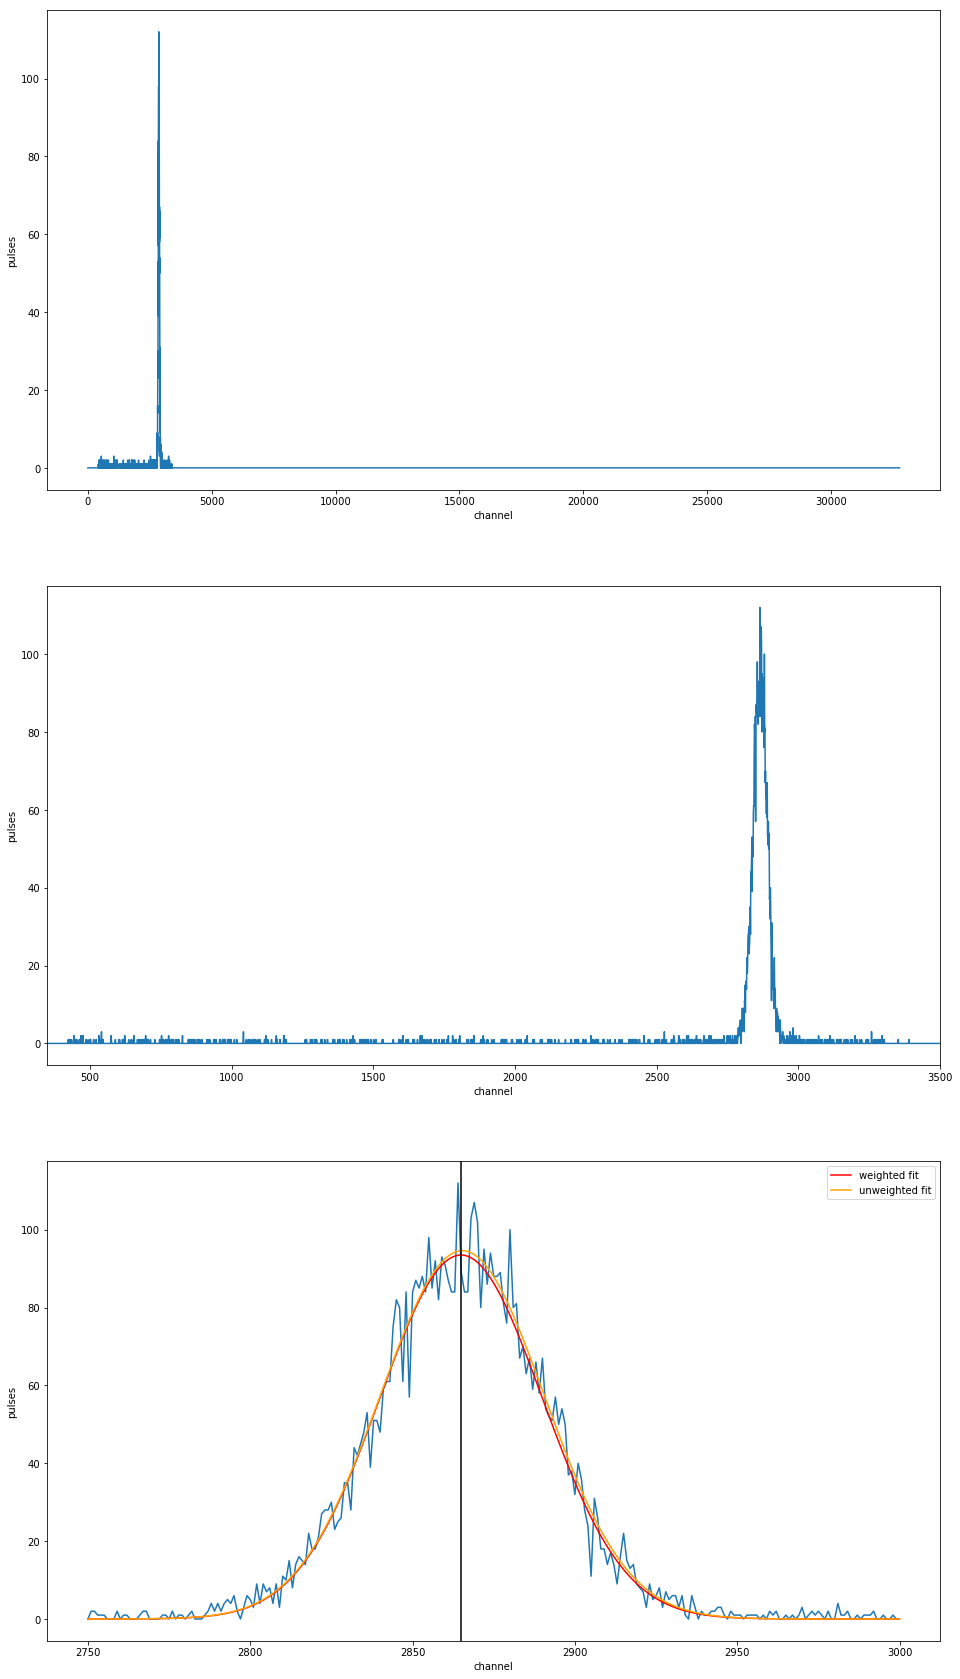

In [7]:
# plots
fig,ax = plt.subplots(3,1,figsize=(16,30))


ax[0].plot(data_1)
ax[0].set_xlabel('channel')
ax[0].set_ylabel('pulses')

ax[1].plot(range(350,3500),data_1[350:3500])
ax[1].set_xlim([350,3500])
ax[1].set_xlabel('channel')
ax[1].set_ylabel('pulses')

ax[2].plot(range(2750,3000),data_1[2750:3000])
x = np.linspace(2750,3000,400)
ax[2].plot(x,gauss(x,*opt_w),'red',label='weighted fit')
ax[2].plot(x,gauss(x,*opt_u),'orange',label='unweighted fit')
ax[2].axvline(opt_w[1],c="black")
ax[2].legend(loc='best')
ax[2].set_xlabel('channel')
ax[2].set_ylabel('pulses')

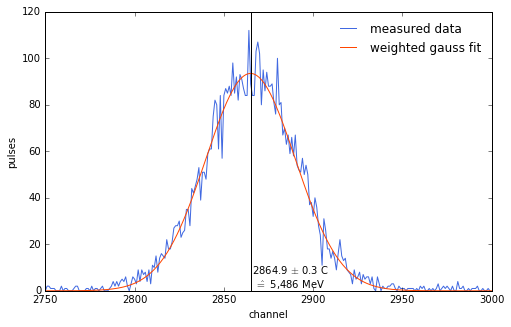

In [10]:
# plots

fig,ax = plt.subplots(1,1,figsize=(8,5))
   
ax.plot(range(2750,3000),data_1[2750:3000],'royalblue',label='measured data')
x = np.linspace(2750,3000,400)
ax.plot(x,gauss(x,*opt_w),'orangered',label='weighted gauss fit')
#ax.plot(x,gauss(x,*opt_u),'orange',label='unweighted fit')
ax.axvline(opt_w[1],c='k')
meanLabel = '%.1f $\pm$ %.1f C\n $\^=$ 5,486 MeV'%(opt_w[1],err_w[1])
ax.annotate(meanLabel, xy=(opt_w[1]+1, 1), xytext=(opt_w[1]+1, 1))
ax.legend(loc='best',frameon=False)
ax.set_xlabel('channel')
ax.set_ylabel('pulses')
#fig.savefig('t1_calibration.pdf',format='pdf')"

In [9]:
# calibration
E_scaling = Ekin_α / opt_w[1]
# propagation of error
ΔE_scaling = err_w[1] / opt_w[1] * E_scaling
print('scalation factor of energy versus channel: (%.8f +- %.8f) * 10^-3 MeV/channel' %(E_scaling * 10**3,ΔE_scaling * 10**3))

scalation factor of energy versus channel: (1.91487167 +- 0.00003321) * 10^-3 MeV/channel


### Task 2

In [10]:
# calculations

# weighted gauss-fits
for i in range(len(data_2)):
    initial_guess = [1,np.argmax(data_2[i]),1]
    opt, cov = curve_fit(gauss, range(len(data_2[i])),data_2[i],p0 = initial_guess,sigma = Δdata_2[i])
    err = np.sqrt(np.diag(cov))
    if (i == 0):
        opt_2 = [opt]
        err_2 = [err]
    else:
        opt_2 = np.append(opt_2,[opt],axis=0)
        err_2 = np.append(err_2,[err],axis=0)

# dE/dP

E = np.rollaxis(opt_2,0,2)[1] * E_scaling
E_err = np.sqrt((np.rollaxis(opt_2,0,2)[1] * ΔE_scaling)**2+(E_scaling*(np.rollaxis(err_2,0,2)[1])**2))
dE = E[1:] - E[:-1]
dP = P_air[1:] - P_air[:-1]




In [11]:
# dE/dP error
dEdP = dE/dP
dEdP_err = []

for i in range(len(dEdP)):
    err = np.sqrt((E_err[i]/(P_air[i+1] - P_air[i]))**2+(E_err[i+1]/(P_air[i+1] - P_air[i]))**2+(P_err*(E[i+1] - E[i])/(P_air[i+1] - P_air[i]))**2+(P_err*(E[i+1] - E[i])/(P_air[i+1] - P_air[i]))**2)
    dEdP_err.append(err)
    

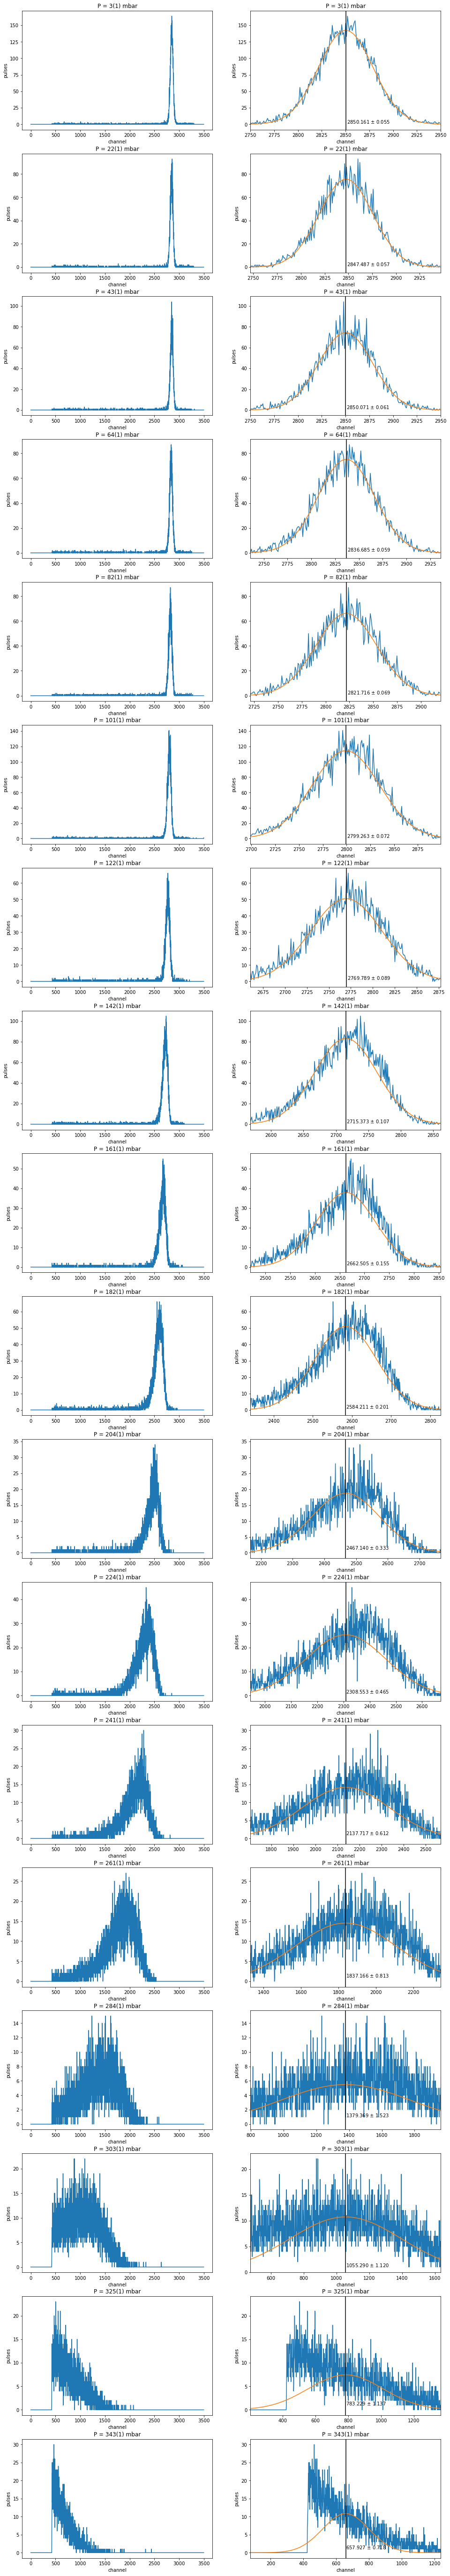

In [12]:
# plots concerning data and fits

fig,ax = plt.subplots(18,2,figsize=(16,100))

for i in range(18):
    ax[i][0].plot(data_2[i][:3500])
    ax[i][0].set_xlabel('channel')
    ax[i][0].set_ylabel('pulses')
    ax[i][0].set_title('P = %.0f(1) mbar'%(P_air[i]*10**-2))
    d = max(100,min(3*i**2,580))
    ax[i][1].plot(range(int(opt_2[i][1])-d,int(opt_2[i][1])+d),data_2[i][int(opt_2[i][1])-d:int(opt_2[i][1])+d])
    x = np.linspace(int(opt_2[i][1])-d,int(opt_2[i][1])+d,100)
    ax[i][1].plot(x,gauss(x,*opt_2[i]))
    ax[i][1].axvline(opt_2[i][1],c="black")
    meanLabel = "%.3f $\pm$ %.3f"%(opt_2[i][1],err_2[i][1])
    ax[i][1].annotate(meanLabel, xy=(opt_2[i][1]+1, 1), xytext=(opt_2[i][1]+1, 1))
    ax[i][1].set_xlim([int(opt_2[i][1])-d,int(opt_2[i][1])+d])
    ax[i][1].set_xlabel('channel')
    ax[i][1].set_ylabel('pulses')
    ax[i][1].set_title('P = %.0f(1) mbar'%(P_air[i]*10**-2))

Die letzten beiden sollten ausgeschlossen werden, da kein vernünftiger Fit möglich ist. Vielleicht auch die letzten 3...   
Durch die Gewichtung wird tatsächlich der Rechtsdrall ausgeglichen. Für die ungewichtete Variante einfach oben das sigma auskommentieren...

(-0.05, 0.01)

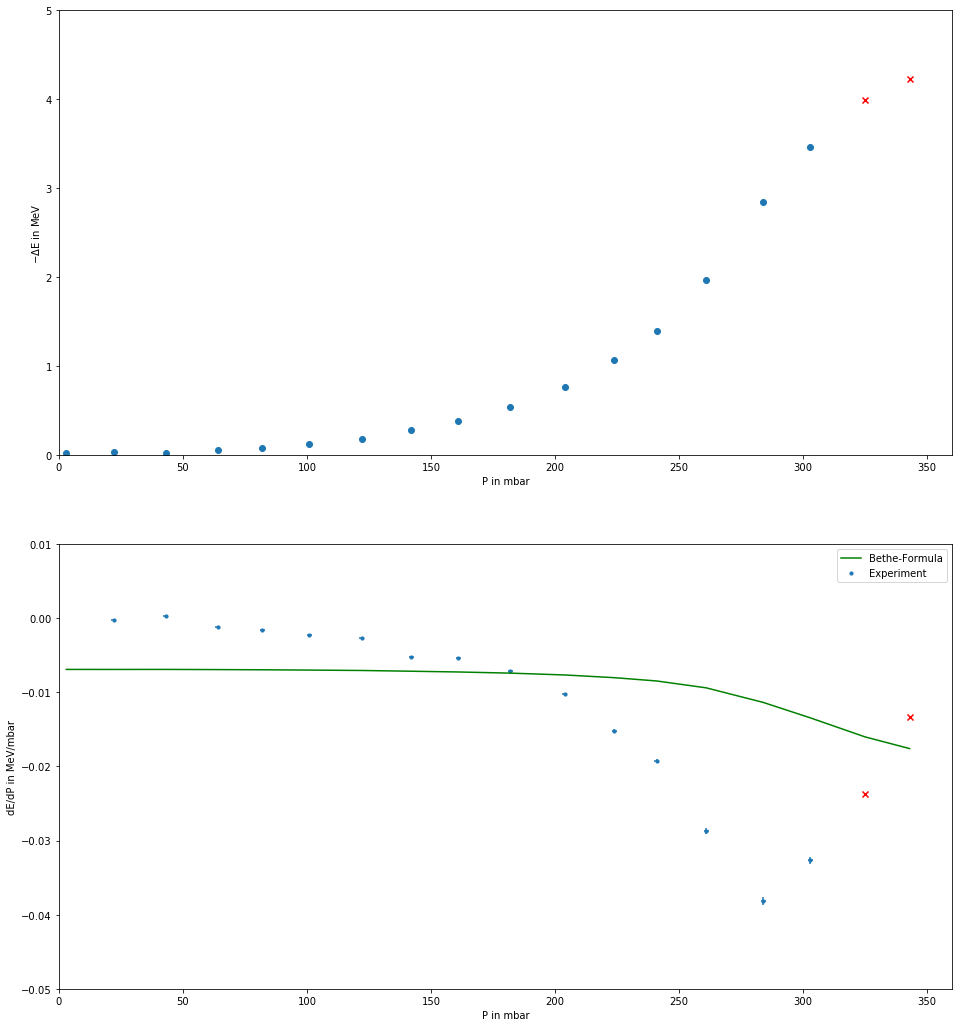

In [13]:
# plots

fig,ax = plt.subplots(2,1,figsize=(16,18))

ax[0].scatter(P_air[:-2] * 10**-2, Ekin_α - E[:-2])
ax[0].scatter(P_air[16:] * 10**-2,Ekin_α - E[16:],marker='x',color='r')
ax[0].set_xlim([0,360])
ax[0].set_ylim([0,5])
ax[0].set_xlabel('P in mbar')
ax[0].set_ylabel(r'$-\Delta$E in MeV')

ax[1].scatter(P_air[1:-2] * 10**-2, dE[:-2]/dP[:-2] * 10**2,label='Experiment',s=10)
ax[1].errorbar(P_air[1:-2] * 10**-2, dE[:-2]/dP[:-2] * 10**2,xerr=P_err, yerr=dEdP_err[:-2],ls="")
ax[1].scatter(P_air[16:] * 10**-2, dE[15:]/dP[15:] * 10**2,marker='x',color='r')
ax[1].plot(P_air * 10**-2, dE_dP(v(m_α,E),W_air,k_air,l,T,Z_α),label='Bethe-Formula',c="green")
ax[1].legend(loc='best')
ax[1].set_xlabel('P in mbar')
ax[1].set_ylabel('dE/dP in MeV/mbar')
ax[1].set_xlim([0,360])
ax[1].set_ylim([-0.05,0.01])

(-0.05, 0.01)

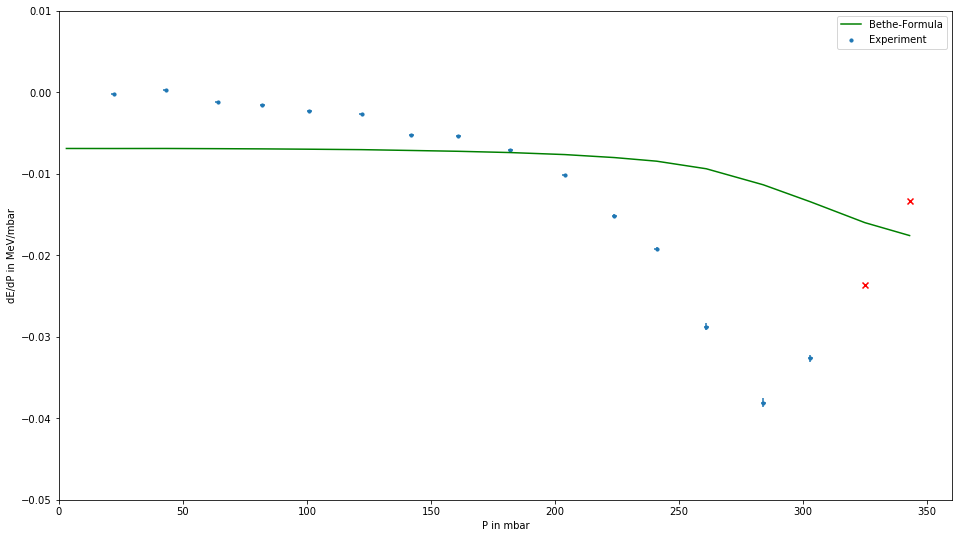

In [46]:
fig,ax = plt.subplots(1,1,figsize=(16,9))

ax.scatter(P_air[1:-2] * 10**-2, dE[:-2]/dP[:-2] * 10**2,label='Experiment',s=10)
ax.errorbar(P_air[1:-2] * 10**-2, dE[:-2]/dP[:-2] * 10**2,xerr=P_err, yerr=dEdP_err[:-2],ls="")
ax.scatter(P_air[16:] * 10**-2, dE[15:]/dP[15:] * 10**2,marker='x',color='r')
ax.plot(P_air * 10**-2, dE_dP(v(m_α,E),W_air,k_air,l,T,Z_α),label='Bethe-Formula',c="green")
ax.legend(loc='best')
ax.set_xlabel('P in mbar')
ax.set_ylabel('dE/dP in MeV/mbar')
ax.set_xlim([0,360])
ax.set_ylim([-0.05,0.01])

Irgendwas scheint in der Theorie noch nicht ganz zu passen, der sollte zum Beispiel bei 0 anfangen...

### Task 3

In [32]:
# calculations

# weighted gauss-fits
opt_3 = [[],[],[]]
err_3 = [[],[],[]]
for j in range(len(data_3)):
    for i in range(len(data_3[j])):
        initial_guess = [1,np.argmax(data_3[j][i]),1]
        opt, cov = curve_fit(gauss, range(len(data_3[j][i])),data_3[j][i],p0 = initial_guess,sigma = Δdata_3[j][i])
        err = np.sqrt(np.diag(cov))
        if (i == 0):
            opt_3[j] = [opt]
            err_3[j] = [err]
        else:
            opt_3[j] = np.append(opt_3[j],[opt],axis=0)
            err_3[j] = np.append(err_3[j],[err],axis=0)

# dE and if needed dE/dP

E_air = np.rollaxis(np.array(opt_3),1,3)[0][1] * E_scaling
ΔE_air = Ekin_α- E_air  
ΔE_air_err = np.sqrt((np.rollaxis(np.array(err_3),1,3)[0][1] * E_scaling)**2+(np.rollaxis(np.array(opt_3),1,3)[0][1] * ΔE_scaling)**2)
# dE_air = E_air[1:] - E_air[:-1]
# dP_air = P_air_3[1:] - P_air_3[:-1]

E_He = np.rollaxis(np.array(opt_3),1,3)[1][1] * E_scaling
# dE_He = E_He[1:] - E_He[:-1]
# dP_He = P_He[1:] - P_He[:-1]

E_Ar = np.rollaxis(np.array(opt_3),1,3)[2][1] * E_scaling
# dE_Ar = E_Ar[1:] - E_Ar[:-1]
# dP_Ar = P_Ar[1:] - P_Ar[:-1]

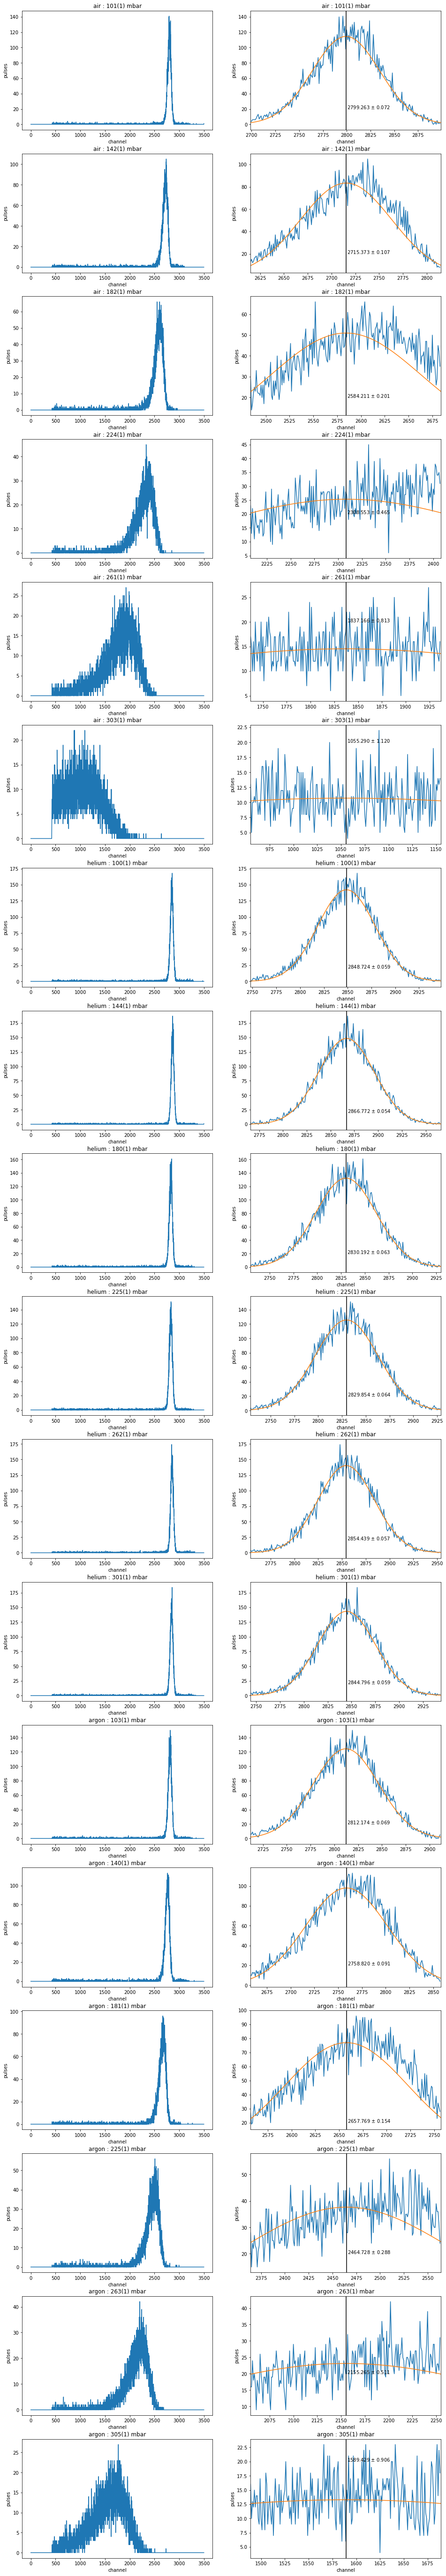

In [28]:
# plots concerning data and fits

fig,ax = plt.subplots(18,2,figsize=(16,100))

# air
for i in range(6):
    ax[i][0].plot(data_3[0][i][:3500])
    ax[i][0].set_xlabel('channel')
    ax[i][0].set_ylabel('pulses')
    ax[i][0].set_title('air : %.0f(1) mbar'%(P_air_3[i]*10**-2))
    d = max(100,min(3*i**2,580))
    ax[i][1].plot(range(int(opt_3[0][i][1])-d,int(opt_3[0][i][1])+d),data_3[0][i][int(opt_3[0][i][1])-d:int(opt_3[0][i][1])+d])
    x = np.linspace(int(opt_3[0][i][1])-d,int(opt_3[0][i][1])+d,100)
    ax[i][1].plot(x,gauss(x,*opt_3[0][i]))
    
    ax[i][1].axvline(opt_3[0][i][1],c="black")
    meanLabel = "%.3f $\pm$ %.3f"%(opt_3[0][i][1],err_3[0][i][1])
    ax[i][1].annotate(meanLabel, xy=(opt_3[0][i][1]+1, 20), xytext=(opt_3[0][i][1]+1, 20))
    
    
    ax[i][1].set_xlim([int(opt_3[0][i][1])-d,int(opt_3[0][i][1])+d])
    ax[i][1].set_xlabel('channel')
    ax[i][1].set_ylabel('pulses')
    ax[i][1].set_title('air : %.0f(1) mbar'%(P_air_3[i]*10**-2))
    


# helium
for i in range(6):
    ax[i+6][0].plot(data_3[1][i][:3500])
    ax[i+6][0].set_xlabel('channel')
    ax[i+6][0].set_ylabel('pulses')
    ax[i+6][0].set_title('helium : %.0f(1) mbar'%(P_He[i]*10**-2))
    d = max(100,min(3*i**2,580))
    ax[i+6][1].plot(range(int(opt_3[1][i][1])-d,int(opt_3[1][i][1])+d),data_3[1][i][int(opt_3[1][i][1])-d:int(opt_3[1][i][1])+d])
    x = np.linspace(int(opt_3[1][i][1])-d,int(opt_3[1][i][1])+d,100)
    ax[i+6][1].plot(x,gauss(x,*opt_3[1][i]))
    
    ax[i+6][1].axvline(opt_3[1][i][1],c="black")
    meanLabel = "%.3f $\pm$ %.3f"%(opt_3[1][i][1],err_3[1][i][1])
    ax[i+6][1].annotate(meanLabel, xy=(opt_3[1][i][1]+1, 20), xytext=(opt_3[1][i][1]+1, 20))
    
    ax[i+6][1].set_xlim([int(opt_3[1][i][1])-d,int(opt_3[1][i][1])+d])
    ax[i+6][1].set_xlabel('channel')
    ax[i+6][1].set_ylabel('pulses')
    ax[i+6][1].set_title('helium : %.0f(1) mbar'%(P_He[i]*10**-2))

# argon
for i in range(6):
    ax[i+12][0].plot(data_3[2][i][:3500])
    ax[i+12][0].set_xlabel('channel')
    ax[i+12][0].set_ylabel('pulses')
    ax[i+12][0].set_title('argon : %.0f(1) mbar'%(P_Ar[i]*10**-2))
    d = max(100,min(3*i**2,580))
    ax[i+12][1].plot(range(int(opt_3[2][i][1])-d,int(opt_3[2][i][1])+d),data_3[2][i][int(opt_3[2][i][1])-d:int(opt_3[2][i][1])+d])
    x = np.linspace(int(opt_3[2][i][1])-d,int(opt_3[2][i][1])+d,100)
    ax[i+12][1].plot(x,gauss(x,*opt_3[2][i]))
    
    ax[i+12][1].axvline(opt_3[2][i][1],c="black")
    meanLabel = "%.3f $\pm$ %.3f"%(opt_3[2][i][1],err_3[2][i][1])
    ax[i+12][1].annotate(meanLabel, xy=(opt_3[2][i][1]+1, 20), xytext=(opt_3[2][i][1]+1, 20))
    
    ax[i+12][1].set_xlim([int(opt_3[2][i][1])-d,int(opt_3[2][i][1])+d])
    ax[i+12][1].set_xlabel('channel')
    ax[i+12][1].set_ylabel('pulses')
    ax[i+12][1].set_title('argon : %.0f(1) mbar'%(P_Ar[i]*10**-2))

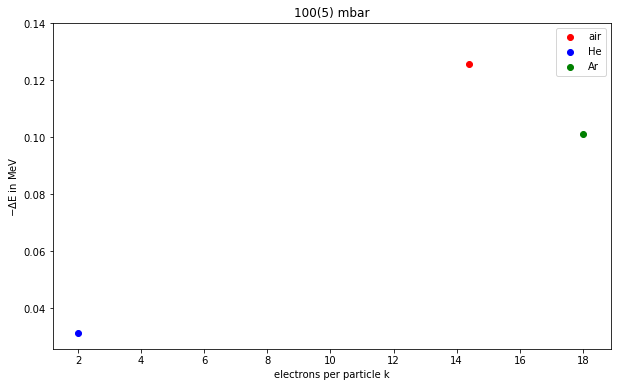

In [44]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.scatter(k_air,ΔE_air[0],label='air',color='r')
ax.scatter(k_He,Ekin_α - E_He[0],label='He',color='b')
ax.scatter(k_Ar,Ekin_α - E_Ar[0],label='Ar',color='g')   
ax.set_xlabel('electrons per particle k')
ax.set_ylabel(r'$-\Delta$E in MeV')
ax.set_title('%.0f(5) mbar'%(np.floor(P_air_3[0]*10**-3)*10))
ax.legend(loc='best')

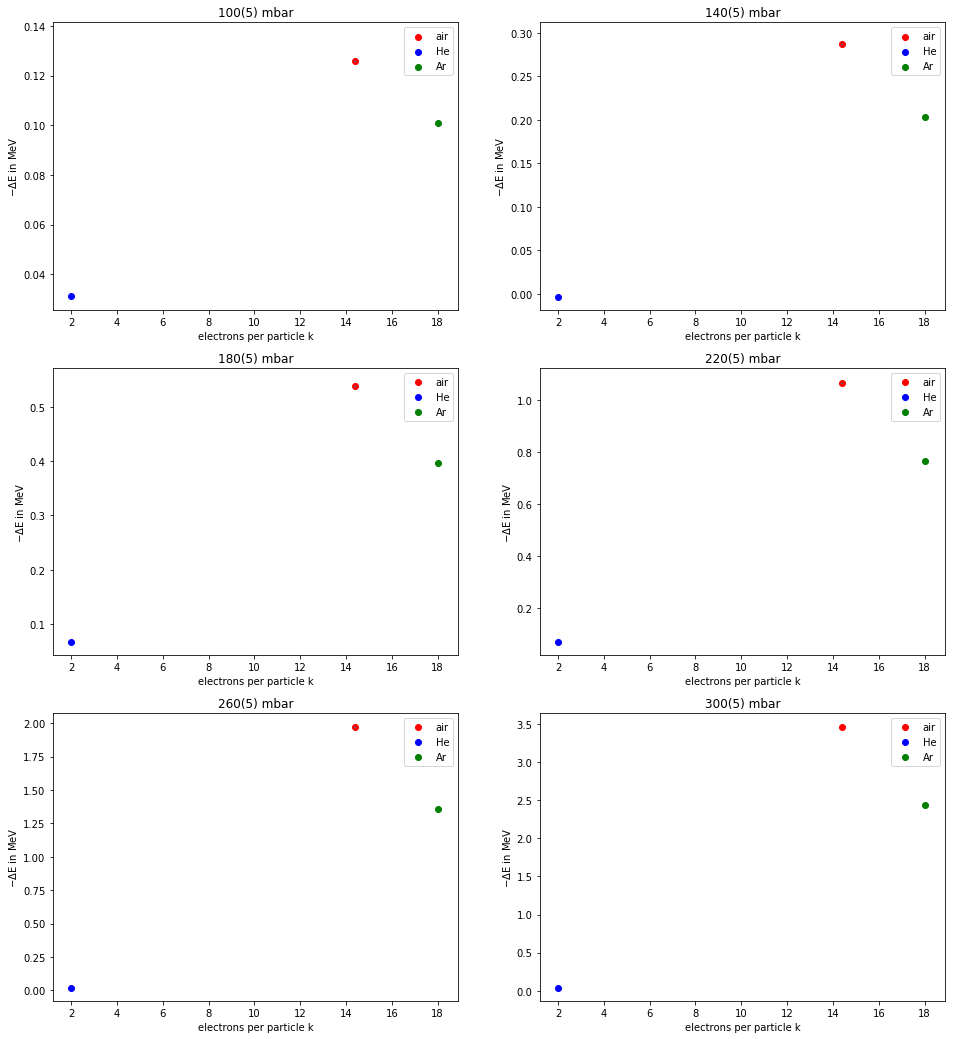

In [45]:
###### plots

fig,ax = plt.subplots(3,2,figsize=(16,18))

for i in range(6):
    ax[i//2][i%2].scatter(k_air,ΔE_air[i],label='air',color='r')
    ax[i//2][i%2].errorbar(k_air,ΔE_air[i],yerr = ΔE_air_err[i]) #Die Fehlerbalken sind sehr klein
    ax[i//2][i%2].scatter(k_He,Ekin_α - E_He[i],label='He',color='b')
    ax[i//2][i%2].scatter(k_Ar,Ekin_α - E_Ar[i],label='Ar',color='g')    
    ax[i//2][i%2].set_xlabel('electrons per particle k')
    ax[i//2][i%2].set_ylabel(r'$-\Delta$E in MeV')
    ax[i//2][i%2].set_title('%.0f(5) mbar'%(np.floor(P_air_3[i]*10**-3)*10))
    ax[i//2][i%2].legend(loc='best')

Unter der 3 steht 'Explain your results'. Das soll also wahrscheinlich so aussehen, wir müssen nur überlegen, woher es kommen könnte...